In [10]:
'''
어떻게 작동하는지 잘 이해하고 있으면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파라미터를 빠르게 찾을 수 있다.
작동 원리를 이해하고 있으면 디버깅이나 에러를 효율적으로 분석할 수 있다.

선형 회귀
공식을 이용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구한다.
경사 하강법으로 비용함수를 최소화시킨다.

다항 회귀 - 파라미터가 더 많아서 과대적합되기 쉬움 - 규제 필요

로지스틱 회귀, 소프트맥스 회귀
'''
pass

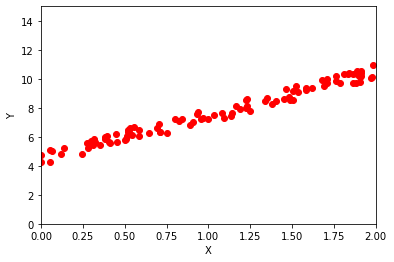

In [11]:
## 4.1 선형 회귀
'''
회귀에 가장 널리 사용되는 성능측정 지표 - 평균 제곱근 오차(RMSE)

정규방정식 - 비용함수를 최소화하는 θ값을 찾기 위한 해석적인 방법
'''

import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.scatter(X, y, c="r") # 점그래프 plt.plot(X, y, ".")으로도 가능
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
# 4.1.1 정규방정식
'''
정규방정식을 사용해 비용함수를 최소화하는 θ값을 계산해보자

어떻게 계산하는거지??? -> 알아보자
'''

X_b = np.c_[np.ones((100, 1)), X] # 상수항과 X값들을 저장
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 세타 구하는 방법???

print(theta_best)

[[4.55691299]
 [2.97135619]]


In [13]:
'''
이 값을 사용해 예측을 해보자
'''

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # np.ones -> 상수항의 x값은 1로 가정하기 때문
y_predict = X_new_b.dot(theta_best) # 행렬의 곱
print(y_predict) # X=0, 2 일 때의 각각 예측 값임

[[ 4.55691299]
 [10.49962537]]


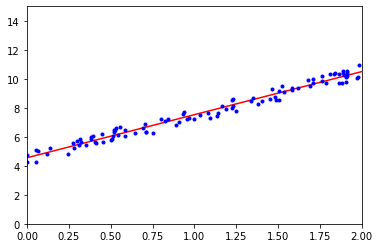

In [14]:
plt.plot(X_new, y_predict, "r-") # r-  ->  red 직선그래프
plt.plot(X, y, "b.") # b.  ->  blue 점그래프
plt.axis([0, 2, 0, 15]) # X, y 범위 설정
plt.show()

In [15]:
'''
사이킷런에서 선형 회귀를 수행하는 것은 간단하다 (3줄 끝)
'''
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_) # 가중치와 편향
print(lin_reg.predict(X_new)) # X=0, 2일 때의 각각 예측값

[4.55691299] [[2.97135619]]
[[ 4.55691299]
 [10.49962537]]


In [16]:
'''
LinearRegression 클래스는 scipy.linalg.lstsq() 함수(최소 제곱(least squares)에서 이름을 따옴)를 기반으로 한다
'''

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[4.55691299]
 [2.97135619]]


In [17]:
'''
위의 함수는 유사역행렬을 이용해 계산을 한다 (무어-펜로즈 역행렬) -> 직접 구할 수 있다
'''
print(np.linalg.pinv(X_b).dot(y))

[[4.55691299]
 [2.97135619]]


In [18]:
'''
유사역행렬 자체는 특잇값분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산된다.
'''
pass

In [24]:
'''
경사하강법 코드인데, 정규방정식과 값이 같다길래 해봄
'''
eta = 0.1 # lr
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화 θ시작값

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[4.55691299]
 [2.97135619]]
